<a href="https://colab.research.google.com/github/HakanBayazitHabes/example_ANN_AI/blob/master/ANN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yapay Sinir Ağları(ANN) ile Rakam Tanıma

1) İş Problemleri (Business Problem) \
2) Veriyi Anlamak (Data Understanding) \
3) Veriyi Hazırlamak (Data Preparation) \
4) Modelleme (Modeling) \
5) Değerlendirme (Evaluation) \

# 2)Veriyi Anlamak

In [146]:
pip install tensorflow

In [147]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [148]:
# Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [149]:
print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [150]:
print("Test Seti Boyutu:",x_test.shape,y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [151]:
num_labels = len(np.unique(y_train))

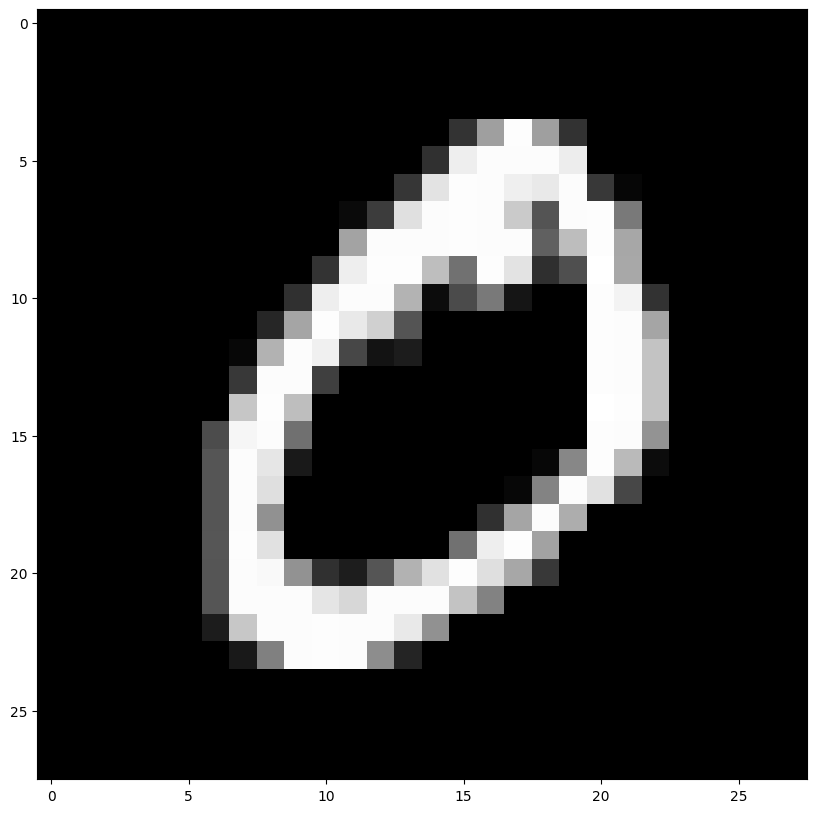

In [152]:
# Veri Setinden Örnekler Gösterilmesi

plt.figure(figsize=(10,10))
plt.imshow(x_train[1], cmap='gray')

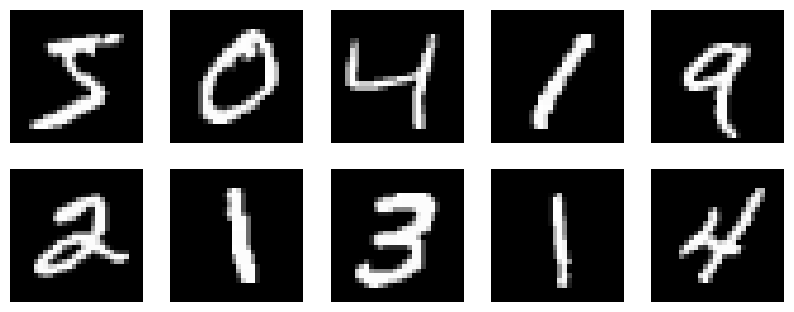

In [153]:
plt.figure(figsize=(10,10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap='gray' )
  plt.axis('off')

In [154]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

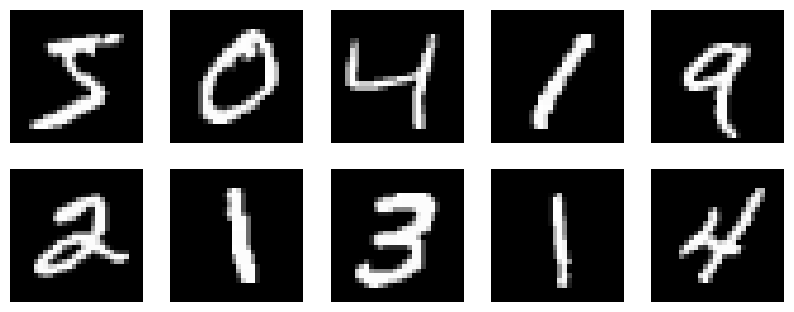

In [155]:
visualize_img(x_train)

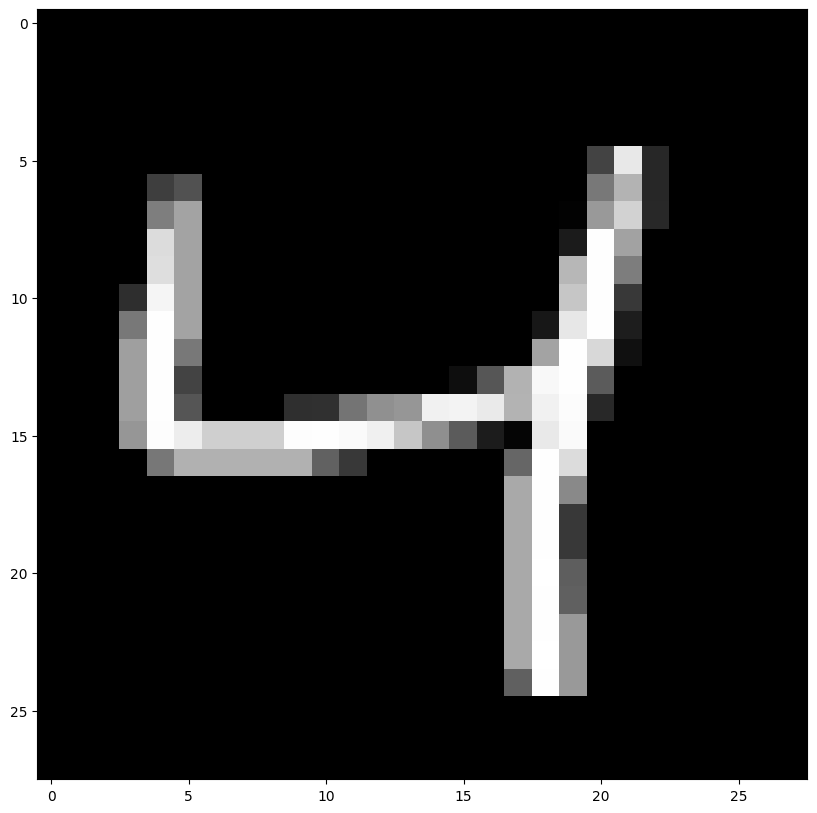

In [156]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap='gray')

In [157]:
#RGB
x_train[2].shape

(28, 28)

In [158]:
x_train[2][10,10]

0

In [159]:
x_train[2][14,10]

49

In [160]:
# Görsel ortalaması Numerik gösterimi
x_train[2].mean()

24.799744897959183

In [161]:
# Görsel toplamı
x_train[2].sum()

19443

In [162]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [163]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [164]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy =(y,x),
                color='white' if img[x][y]<threshold else 'black')

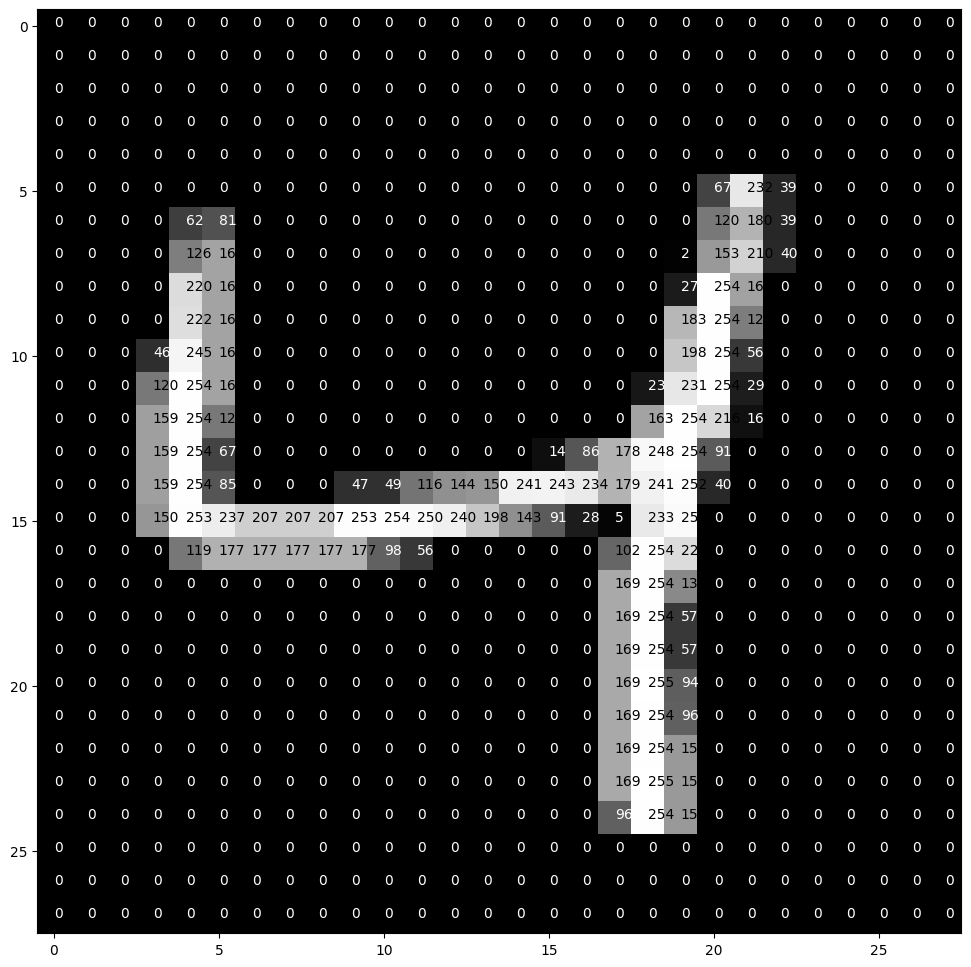

In [165]:
pixel_visualize(x_train[2])

# 3)Veriyi Hazırlamak (Data Preparation)

## ***Encoding***

*   Önce: [0 1 2 3 4 5 6 7 8 9]
*   Sonra: [0 0 1 0 0 0 0 0 0 0]


In [166]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [167]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [168]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## ***Reshaping***

In [169]:
image_size = x_train.shape[1]

In [170]:
image_size

28

In [171]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [172]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


## ***Standardization***

In [173]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 4) Modelleme

## ***Sinir Ağı Mimarisinin***

In [176]:
# burası modelimizin iç özellikleri
model = tf.keras.Sequential([
    # burdaki units ağırlıkları belirlemek için resimden çıkırılacak feature sayısıdır.
    Flatten(input_shape=(28, 28, 1)),
    Dense(units=128, activation="relu", name='layer1'),
    Dense(units=num_labels, activation='softmax', name='output_layer')

])
# 10 tane sınıfımız olduğu için nöron sayısı 1o'dur . units için

# burası modelimizin dış özellikleri
model.compile(loss='categorical_crossentropy', # loss ifadesi hata değerlendirme metriğidir. amaç bu fonk. minimize etmektir.
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), "accuracy"])
# Burada çok sınıflı sınıflandırma söz konusu old. için "categorical_crossentropy" yöntemini kullanıyoruz.
# 2'den fazla sınıf olduğunda optimize edilmesi gereken kayıp kayıp fonksiyonunu ifade ediyor.
# loss fonksiyonunu minimize edecek optimizasyon yöntemi algoritmasıdır.

In [177]:
# Yukarıda yaptığımız işlem ile modelin yapısını tanımladık.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
# model oluşturma
# batch_size => optimizasyon işlemleri sırasında gradyant hesaplarında veri setindeki bütün gözlem birimlerini her epoch da
# göz önünde bulundursun yoksa belirli bi alt küme rastgele seçilerek(Bu, stokastik gradyan iniş (SGD) olarak adlandırılır), alt kümeler üzerinden ağırlık güncellemelrini gerçekleştirir.
# 128 sayısı her iterasyonda 128 gözlem birimine odaklanarak gradyantlar ve türevler hesaplanacaktır.
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.3630 - precision: 0.9470 - recall: 0.8453 - accuracy: 0.8999 - val_loss: 0.1895 - val_precision: 0.9574 - val_recall: 0.9328 - val_accuracy: 0.9444
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1617 - precision: 0.9642 - recall: 0.9439 - accuracy: 0.9542 - val_loss: 0.1337 - val_precision: 0.9698 - val_recall: 0.9525 - val_accuracy: 0.9599
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1152 - precision: 0.9739 - recall: 0.9599 - accuracy: 0.9673 - val_loss: 0.1084 - val_precision: 0.9723 - val_recall: 0.9617 - val_accuracy: 0.9667
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0898 - precision: 0.9790 - recall: 0.9695 - accuracy: 0.9740 - val_loss: 0.0935 - val_precision: 0.9765 - val_recall: 0.9669 - val_accuracy: 0.9712
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0727 - precision: 0.9822 - recall

# 5) Model Başarısını Değerlendirme (Evaluation)

In [182]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0604 - precision: 0.9856 - recall: 0.9793 - accuracy: 0.9824 - val_loss: 0.0895 - val_precision: 0.9761 - val_recall: 0.9698 - val_accuracy: 0.9721
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0509 - precision: 0.9877 - recall: 0.9826 - accuracy: 0.9850 - val_loss: 0.0785 - val_precision: 0.9787 - val_recall: 0.9718 - val_accuracy: 0.9743
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0431 - precision: 0.9893 - recall: 0.9856 - accuracy: 0.9876 - val_loss: 0.0780 - val_precision: 0.9791 - val_recall: 0.9736 - val_accuracy: 0.9761
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0357 - precision: 0.9917 - recall: 0.9884 - accuracy: 0.9900 - val_loss: 0.0759 - val_precision: 0.9798 - val_recall: 0.9756 - val_accuracy: 0.9770
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0312 - precision: 0.9929 - r

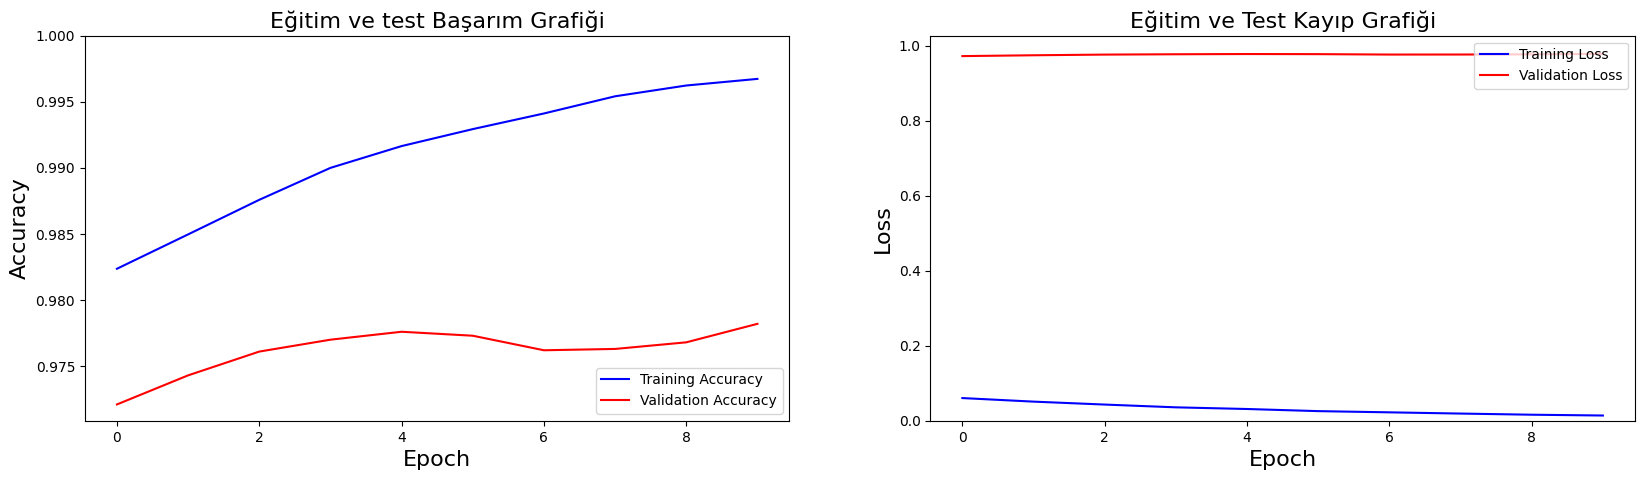

In [183]:
################################
# Accuracy ve Loss Grafikleri
################################

#--------------------------- Grafik 1 Accuracy ----------------------------#

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve test Başarım Grafiği', fontsize=16)

#--------------------------- Grafik 2 Loss ----------------------------#

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()

In [187]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))
# Acc, Precision, Recall birbirine çok yakın çıktığından dolayı sınıflar arası bi' dengesizlik yok diyebilirz.
# Precision tahmin ettiklerimizin başarısıdır. tahmin ettiklerimizin ne kadarı gerçekten doğrudur. not: Yapmış olduğumuz tahminler sonrasına bakar.
# Recall önce gerçek olan değerlere odaklanır daha sonra bunların kaç tanesini doğru tahmin ettik diye bakıyoruz.
# 3 metrik birbirine yakın olduğundan dolayı sınıflandırma işleminin başarılı olduğunu söyleyebiliriz.



Test Accuracy: 97.8%

Test Loss: 7.4%

Test Precision: 98.0%

Test Recall: 97.7%


# Modelin Kaydedilmesi ve tahmin için Kullanılması

In [188]:
model.save('mnist_model.h5')

In [190]:
import random

random = random.randint(0, x_test.shape[0])

In [191]:
random

1090

In [192]:
test_image = x_test[random]

In [193]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

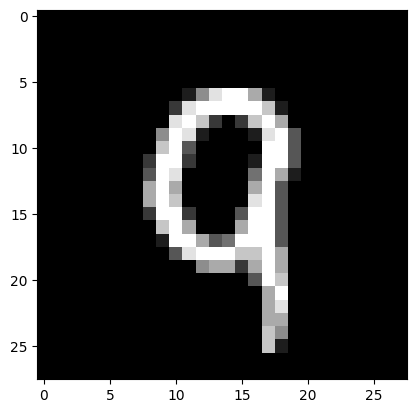

In [194]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')

In [197]:
test_data = x_test[random].reshape(1, 28, 28, 1)

In [198]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 99ms/step


In [199]:
probability

array([[4.7889953e-06, 3.5175727e-09, 1.6650389e-05, 1.6029793e-08,
        1.2767939e-03, 2.2749603e-06, 2.8355055e-08, 1.1966337e-04,
        2.9263498e-07, 9.9857950e-01]], dtype=float32)

In [200]:
predicted_classes = np.argmax(probability)

In [201]:
predicted_classes

9

In [204]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerler: \n{probability}")

Tahmin Edilen Sınıf: 9 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9985795021057129 

Diğer Sınıfların Olasılık Değerler: 
[[4.7889953e-06 3.5175727e-09 1.6650389e-05 1.6029793e-08 1.2767939e-03
  2.2749603e-06 2.8355055e-08 1.1966337e-04 2.9263498e-07 9.9857950e-01]]
